# Compare Surface Roughness

## Import Library

In [98]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import cv2
import io
import base64 
import glob
import os
from scipy import signal
import numpy as np
import matplotlib.image as img
from PIL import Image

## Loaded Image

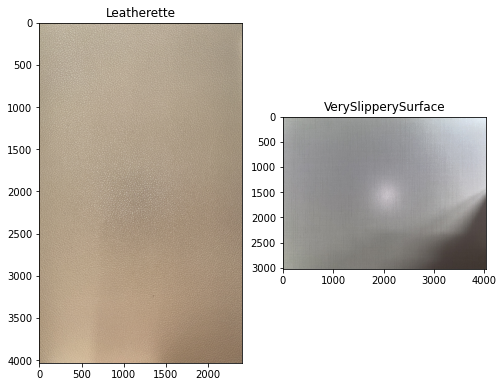

In [99]:
cwd = os.getcwd()
Leatherette_imgPath = cwd+'/DataImage/Leatherette.jpg'
VerySlipperySurface_imgPath = cwd+'/DataImage/VerySlipperySurface.JPG'

Leatherette_Img = img.imread(Leatherette_imgPath)
VerySlipperySurface_Img = img.imread(VerySlipperySurface_imgPath)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title('Leatherette')
plt.imshow(Leatherette_Img)

plt.subplot(1,2,2)
plt.title('VerySlipperySurface')
plt.imshow(VerySlipperySurface_Img)

plt.show()

## Convert to GrayScale using HSI

(4032, 2406)
(3024, 4032)


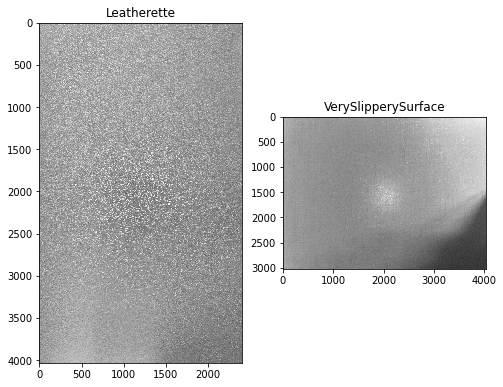

In [100]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.title('Leatherette')
Gray_Leatherette = np.zeros((Leatherette_Img.shape[0],Leatherette_Img.shape[1]))
print(Gray_Leatherette.shape)
Gray_Leatherette = Leatherette_Img[:,:,0]/3+Leatherette_Img[:,:,1]/3+Leatherette_Img[:,:,2]/3
Gray_Leatherette = Gray_Leatherette/255
plt.imshow(Gray_Leatherette, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.subplot(1,2,2)
plt.title('VerySlipperySurface')
Gray_VerySlipperySurface = np.zeros((VerySlipperySurface_Img.shape[0],VerySlipperySurface_Img.shape[1]))
print(Gray_VerySlipperySurface.shape)
Gray_VerySlipperySurface = VerySlipperySurface_Img[:,:,0]/3+VerySlipperySurface_Img[:,:,1]/3+VerySlipperySurface_Img[:,:,2]/3
Gray_VerySlipperySurface = Gray_VerySlipperySurface/255
plt.imshow(Gray_VerySlipperySurface, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.show()

## Center of Image's Surface

In [148]:
def draw_surface(title,grayscaledImg, tile_size, set_zlim ,view_Vertical, view_Horizontal):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection='3d')

    cutted_width = grayscaledImg.shape[1]//2
    cutted_height = grayscaledImg.shape[0]//2
    
    Z = grayscaledImg[cutted_height-tile_size:cutted_height+tile_size,cutted_width-tile_size:cutted_width+tile_size]*100

    x = np.linspace(0,Z.shape[1],Z.shape[1])
    y = np.linspace(0,Z.shape[0],Z.shape[0])
    X, Y = np.meshgrid(x,y)


    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    fig.colorbar(surf, shrink=0.6, aspect=15)
    ax.set_zlim(set_zlim)

    # vertical, horizontal
    ax.view_init(view_Vertical, view_Horizontal)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.title(title)
    plt.tight_layout()
    

## Draw Data Image's Surface

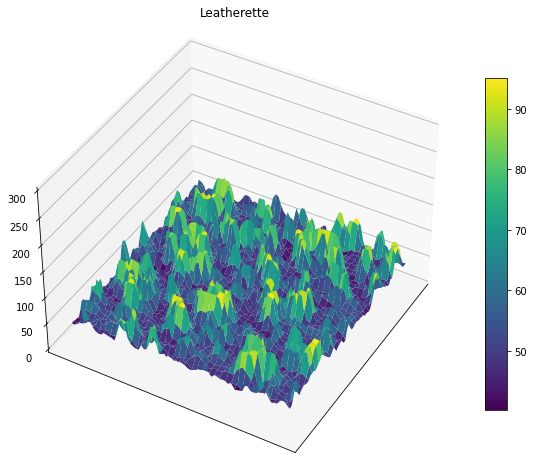

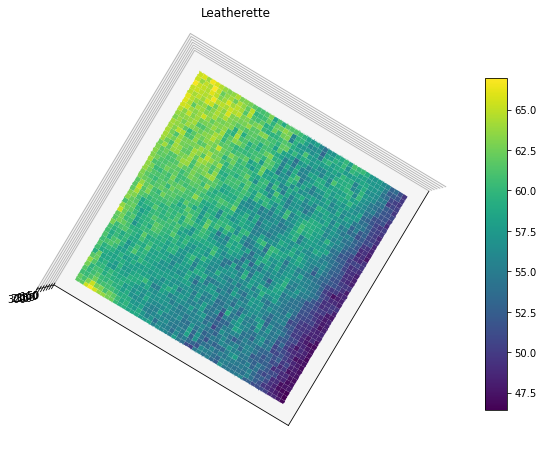

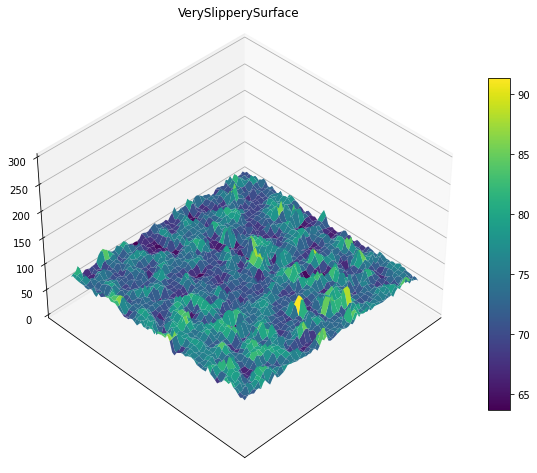

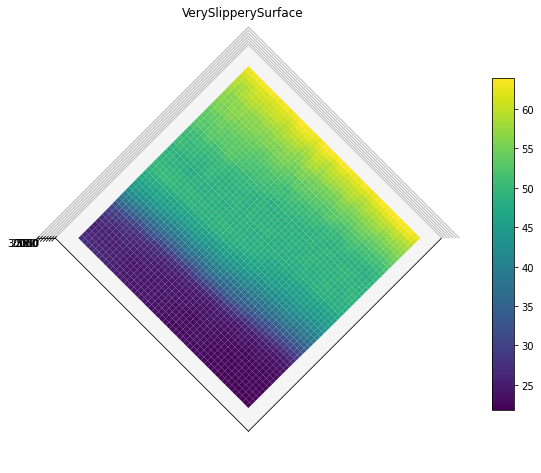

In [168]:
draw_surface('Leatherette',Gray_Leatherette,40,(0,300), 40, 30)
draw_surface('Leatherette',Gray_Leatherette,2000,(0,300), 90, 30)
draw_surface('VerySlipperySurface',Gray_VerySlipperySurface,40,(0,300), 40, 45)
draw_surface('VerySlipperySurface',Gray_VerySlipperySurface,2000,(0,300), 90, 45)


## Extract One Row of Data Image

In [103]:
def extract_one_rowOf_DataImage(title, grayscaledImg):
    plt.figure(figsize=(8,8))
    
    center_row = grayscaledImg.shape[0]//2
    extract_center_row = grayscaledImg[:,center_row]
    
    print('min --> ',min(extract_center_row))
    print('max --> ',max(extract_center_row))
    
    plt.plot(extract_center_row, '-', color='black')
    
    plt.title(title)
    plt.show
    
    return extract_center_row

min -->  0.36601307189542487
max -->  0.9477124183006534


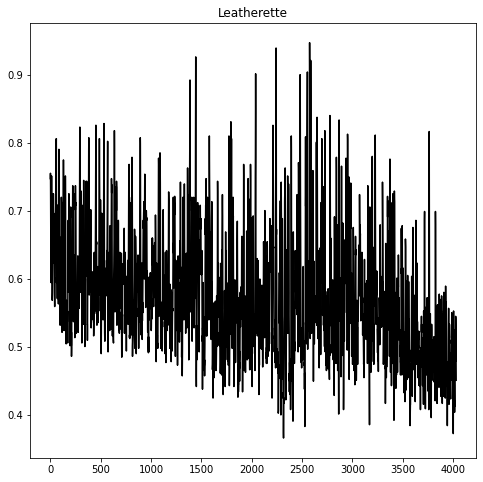

In [104]:
extract_Leatherette = extract_one_rowOf_DataImage('Leatherette',Gray_Leatherette)

min -->  0.4209150326797386
max -->  0.6666666666666666


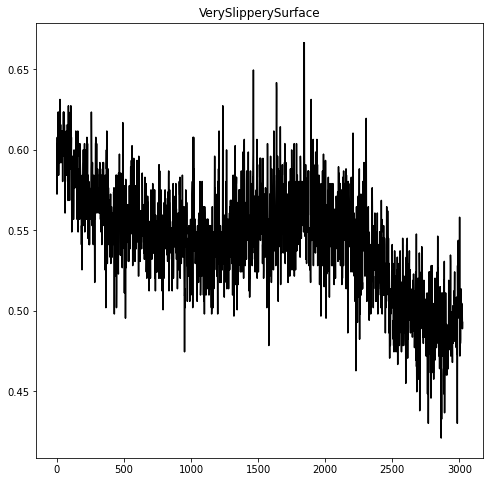

In [105]:
extract_VerySlipperySurface = extract_one_rowOf_DataImage('VerySlipperySurface',Gray_VerySlipperySurface)

## Pass through High & Low Frequency Pass Filter

### Define High & Low Frequency Pass Filter

In [106]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype = "high", analog = False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b,a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [107]:
def draw_frequency(title,filtered_frequency):
    plt.figure(figsize=(8,8))
    
    print('----------------------------------------')
    print(title)
    print('min --> ',min(filtered_frequency))
    print('max --> ',max(filtered_frequency))
    print('----------------------------------------')
    
    plt.plot(filtered_frequency, '-', color='black')

    plt.title(title)
    plt.show

min -->  0.36601307189542487
max -->  0.9477124183006534


array([0.74771242, 0.75555556, 0.74379085, ..., 0.49019608, 0.46666667,
       0.45098039])

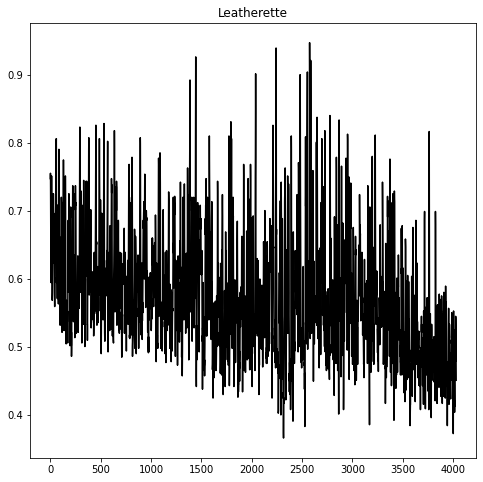

In [108]:
extract_one_rowOf_DataImage('Leatherette',Gray_Leatherette)

----------------------------------------
HPF_Leatherette
min -->  -0.146994827885098
max -->  0.156733391094746
----------------------------------------
----------------------------------------
LPF_Leatherette
min -->  0.39254391515822085
max -->  0.8350709949867249
----------------------------------------


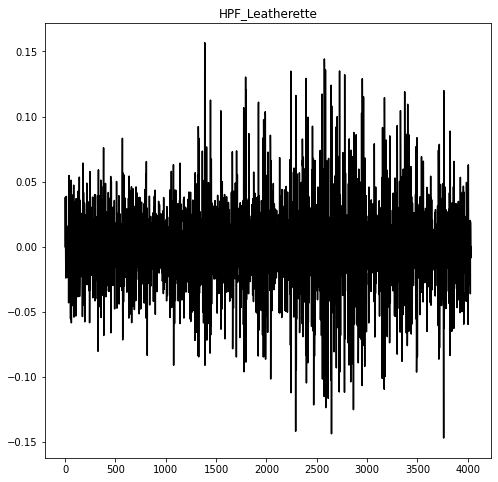

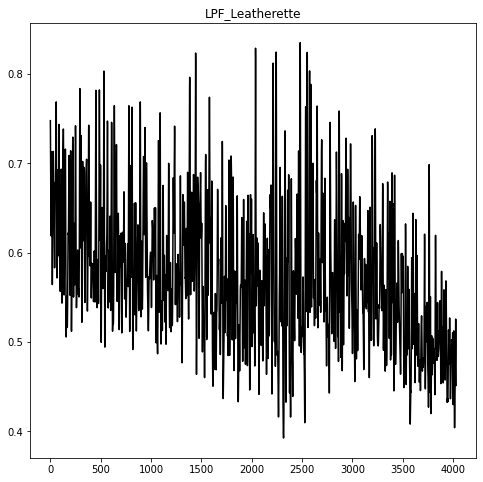

In [121]:
HPF_Leatherette = butter_highpass_filter(extract_Leatherette,10,100)
draw_frequency('HPF_Leatherette',filtered_frequency=HPF_Leatherette)
LPF_Leatherette = butter_lowpass_filter(extract_Leatherette,10,100)
draw_frequency('LPF_Leatherette',filtered_frequency=LPF_Leatherette)


min -->  0.4209150326797386
max -->  0.6666666666666666


array([0.58823529, 0.60392157, 0.57254902, ..., 0.49281046, 0.48888889,
       0.49281046])

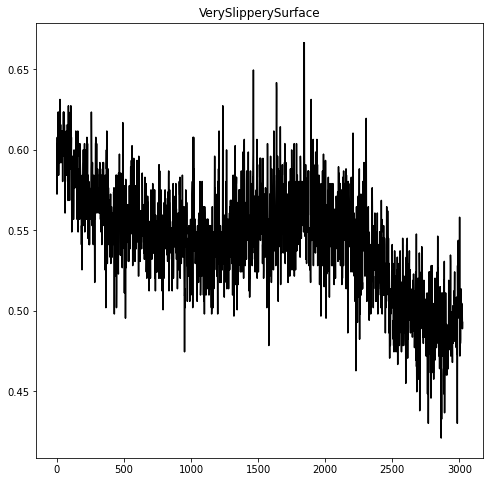

In [110]:
extract_one_rowOf_DataImage('VerySlipperySurface',Gray_VerySlipperySurface)

----------------------------------------
HPF_VerySlipperySurface
min -->  -0.06334486253389865
max -->  0.06205095510188361
----------------------------------------
----------------------------------------
LPF_VerySlipperySurface
min -->  0.4562764377928066
max -->  0.6348093780466495
----------------------------------------


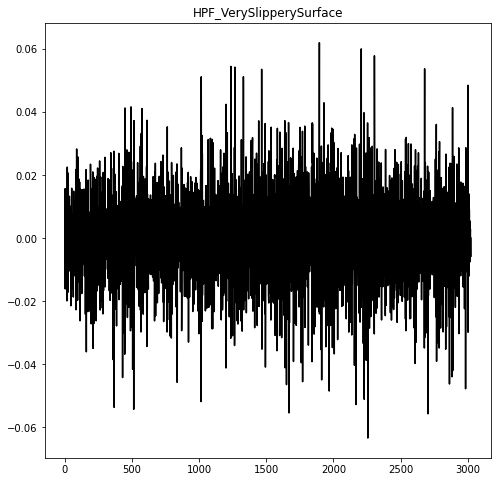

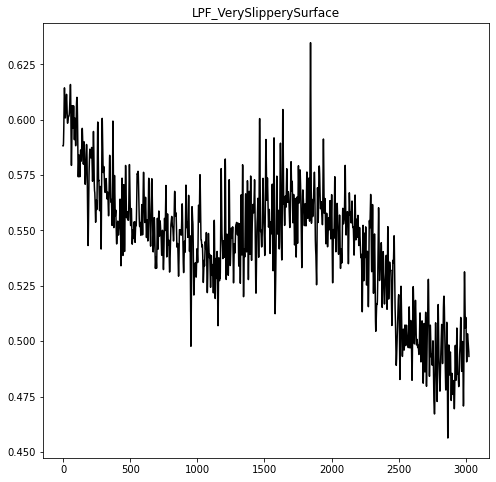

In [178]:
HPF_VerySlipperySurface = butter_highpass_filter(extract_VerySlipperySurface,10,100)
draw_frequency('HPF_VerySlipperySurface',filtered_frequency=HPF_VerySlipperySurface)
LPF_VerySlipperySurface = butter_lowpass_filter(extract_VerySlipperySurface,10,100)
draw_frequency('LPF_VerySlipperySurface',filtered_frequency=LPF_VerySlipperySurface)


## Evaluate Surface Roughness

### Ra : Arithmetical Average Roughness

In [193]:
def compute_Ra(r_profile):
    
    abs_rProfile = np.absolute(r_profile)
    sum_rProfile = np.sum(abs_rProfile)
    
    return sum_rProfile / len(r_profile)

In [195]:
if compute_Ra(HPF_Leatherette) > compute_Ra(HPF_VerySlipperySurface):
    print('Leatherette is rougher than VerySlipperySurface')
else:
    print('VerySlipperySurfae is rougher than Leatherette')

Leatherette is rougher than VerySlipperySurface


### Rmax; Ry : Maximum Height Roughness

In [201]:
def compute_Ry(r_profile):
    
    abs_rProfile = np.absolute(r_profile)
    min_profile = min(abs_rProfile)
    max_profile = max(abs_rProfile)
    
    return min_profile + max_profile

In [200]:
print(compute_Ry(HPF_Leatherette))
print(compute_Ry(HPF_VerySlipperySurface))

0.15673506697751402
0.06334817912892884


### Rz : Ten Point Heignt